# Analyse des joueurs de football - Top 5 Ligues européennes (Saison 23/24)

Ce projet analyse les performances des joueurs dans les 5 premières ligues du monde :
- **Premier League** (Angleterre)
- **La Liga** (Espagne)
- **Serie A** (Italie)
- **Bundesliga** (Allemagne)
- **Ligue 1** (France)

## Objectifs :
1. Visualisation générale des données
2. Dashboard d'analyse des performances
3. Comparaison des ligues

---

## 1. Import des bibliothèques et chargement des données

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
df = pd.read_csv('../data/clean-top5-players.csv')

In [2]:
df['Ligue'] = df['Comp'].str.extract(r'(Premier League|Bundesliga|Serie A|La Liga|Ligue 1)')

df['Position_simple'] = df['Pos'].str.extract(r'([A-Z]{2})')

df['Nation_code'] = df['Nation'].str.extract(r'([A-Z]{3})')

---
## 2. Visualisations générales des données

### 2.1 Top 30 des nations les plus représentées

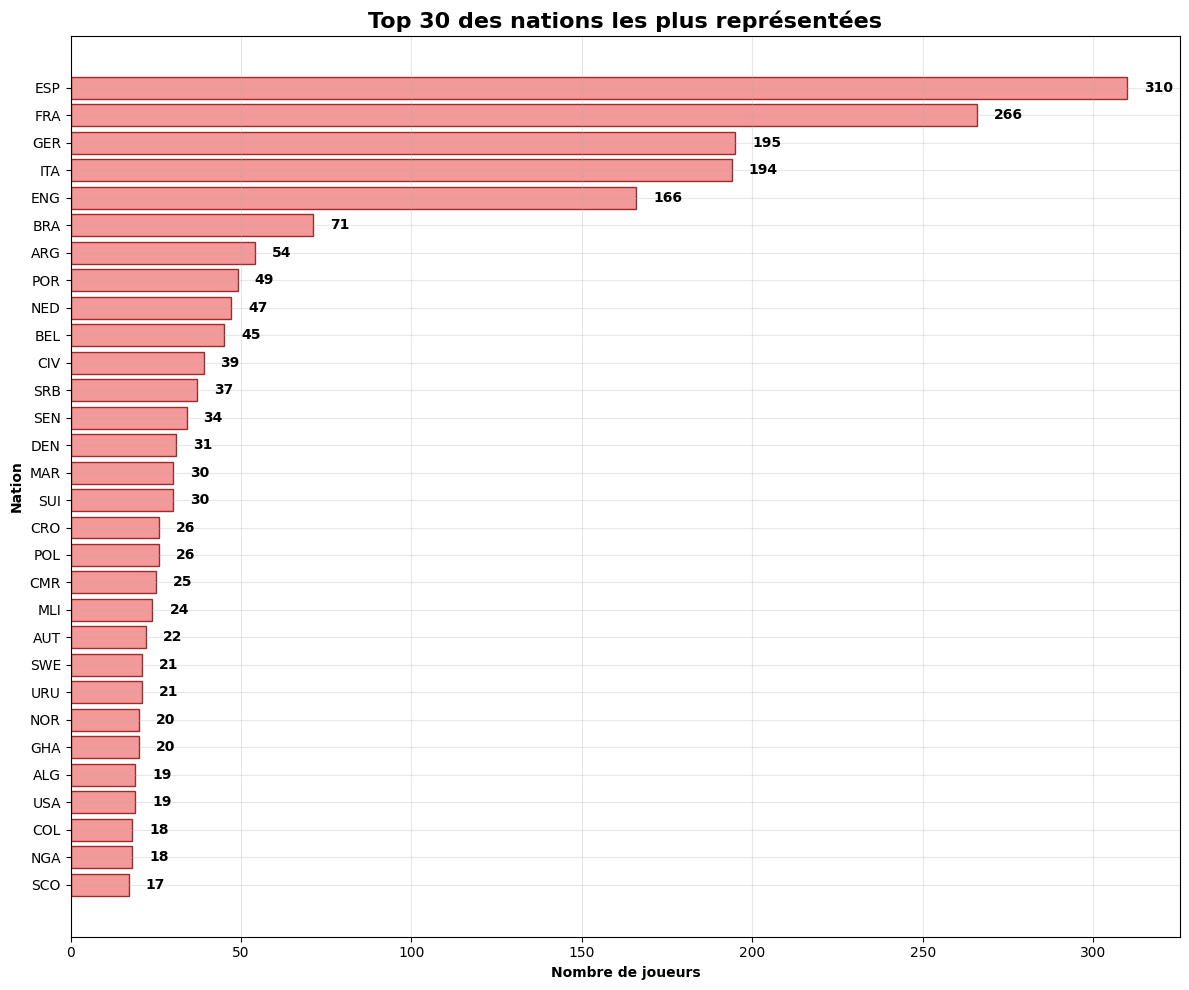

In [3]:
plt.figure(figsize=(12, 10))

nation_counts = df['Nation_code'].value_counts().head(30)

bars = plt.barh(nation_counts.index[::-1], 
                nation_counts.values[::-1], 
                color='lightcoral',
                edgecolor='darkred',
                alpha=0.8)

plt.title('Top 30 des nations les plus représentées', 
          fontsize=16, fontweight='bold')
plt.xlabel('Nombre de joueurs', fontweight='bold')
plt.ylabel('Nation', fontweight='bold')

for i, (bar, value) in enumerate(zip(bars, nation_counts.values[::-1])):
    plt.text(value + 5, bar.get_y() + bar.get_height()/2, 
             str(value), va='center', fontweight='bold')

plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 2.2 Répartition par position de jeu

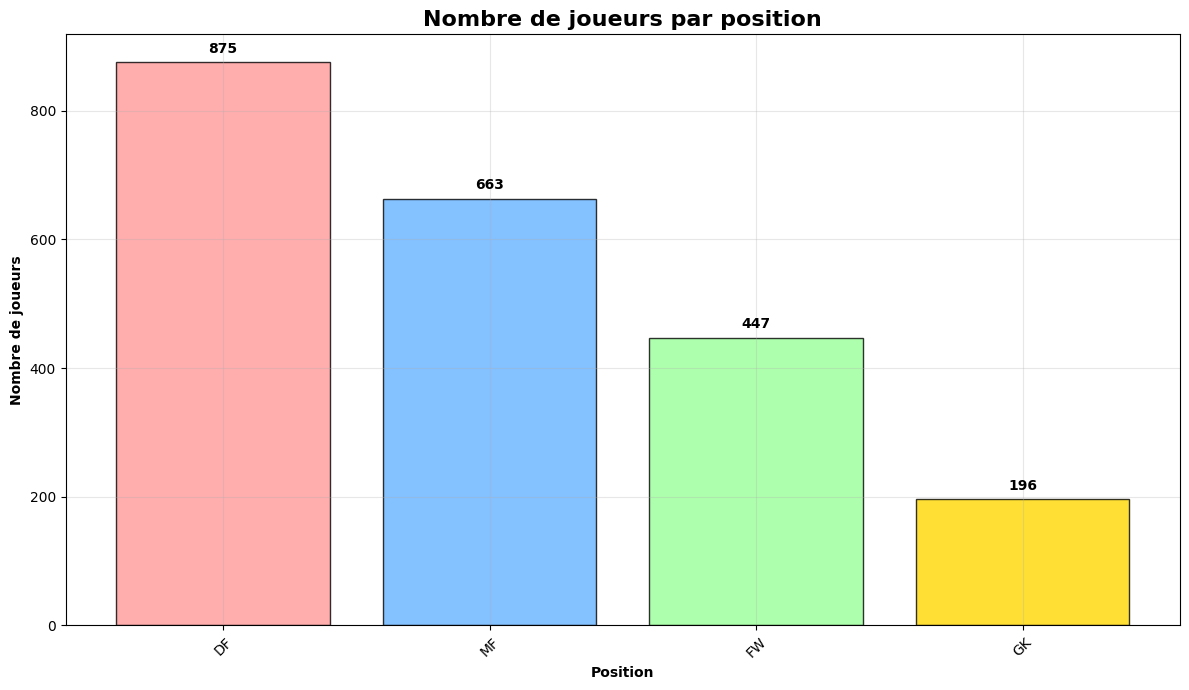

In [4]:
plt.figure(figsize=(12, 7))

pos_counts = df['Position_simple'].value_counts()
colors_pos = ['#FF9999', '#66B2FF', '#99FF99', '#FFD700', '#FF99CC', '#99FFCC']

bars = plt.bar(pos_counts.index, pos_counts.values, 
               color=colors_pos[:len(pos_counts)],
               edgecolor='black',
               alpha=0.8)

plt.title('Nombre de joueurs par position', 
          fontsize=16, fontweight='bold')
plt.xlabel('Position', fontweight='bold')
plt.ylabel('Nombre de joueurs', fontweight='bold')
plt.xticks(rotation=45)

for bar, value in zip(bars, pos_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
             str(value), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()